In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

import PhenomA as pa
import LISA as li
import WaveformTools as wt
reload(wt)


<module 'WaveformTools' from 'WaveformTools.pyc'>

# Setup LISA object, load sky & polarization averaged transfer function, plot sensitivity curve


### LISA object options

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Tobs, default=4 yr ---- example: lisa = li.LISA(Tobs=li.YEAR)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Larm, default=2.5e9 (meters)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; NC,   default=2 (number of data channels, 1 or 2)

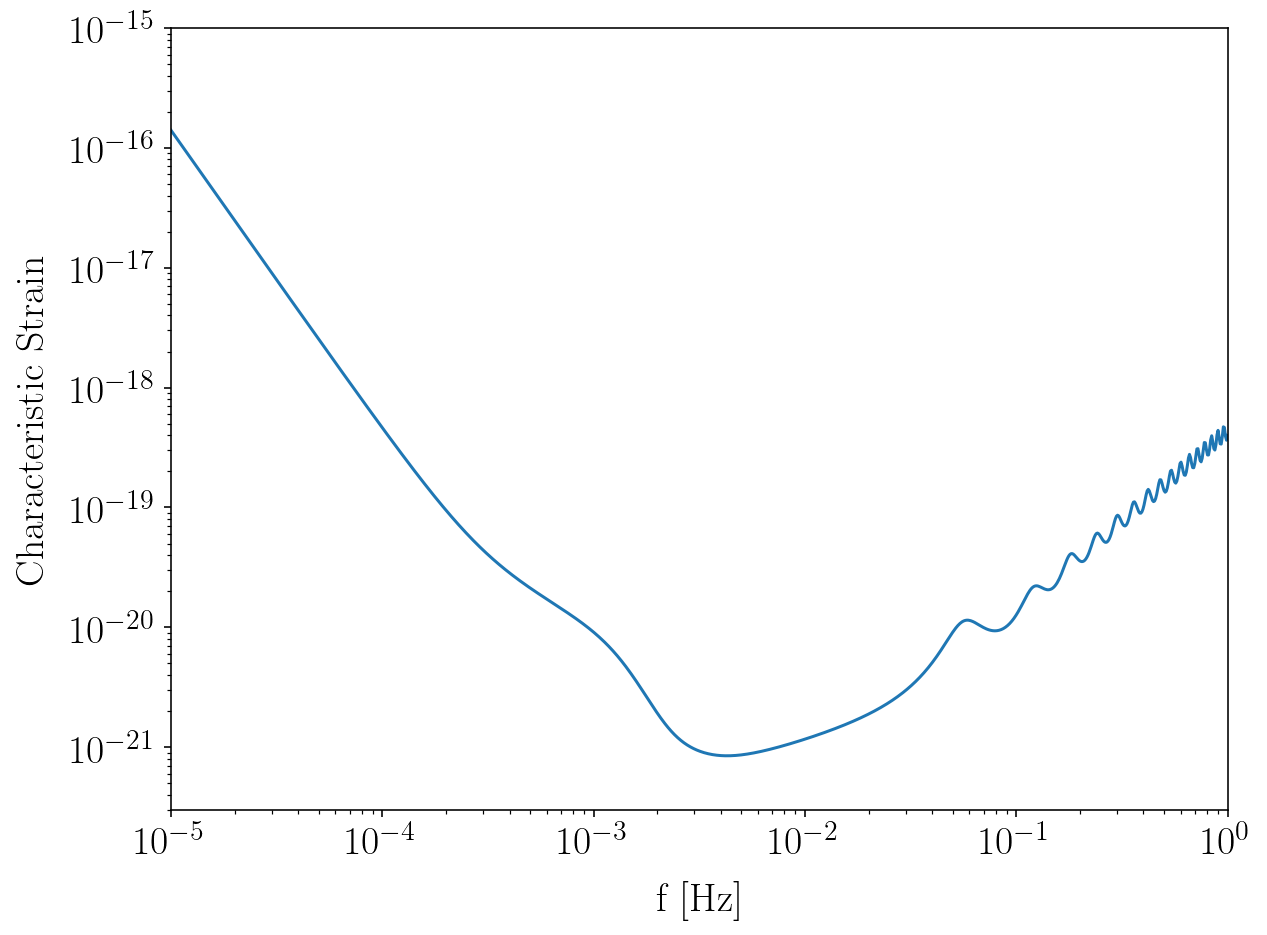

In [6]:
# create LISA object
lisa = li.LISA() 

# Plot LISA's sensitivity curve
f  = np.logspace(np.log10(1.0e-5), np.log10(1.0e0), 1000)
Sn = lisa.Sn(f)
li.PlotSensitivityCurve(f, Sn) # provide additional argument, e.g. 'SensitivityCurve.pdf', to save figure

Redshift provided. 
	Luminosity Distance........... 25924.1518617 Mpc
Redshift provided. 
	Luminosity Distance........... 25924.1518617 Mpc
0.005928955670629558

SNR........ 318.334360158

SNR........ 861.464218724


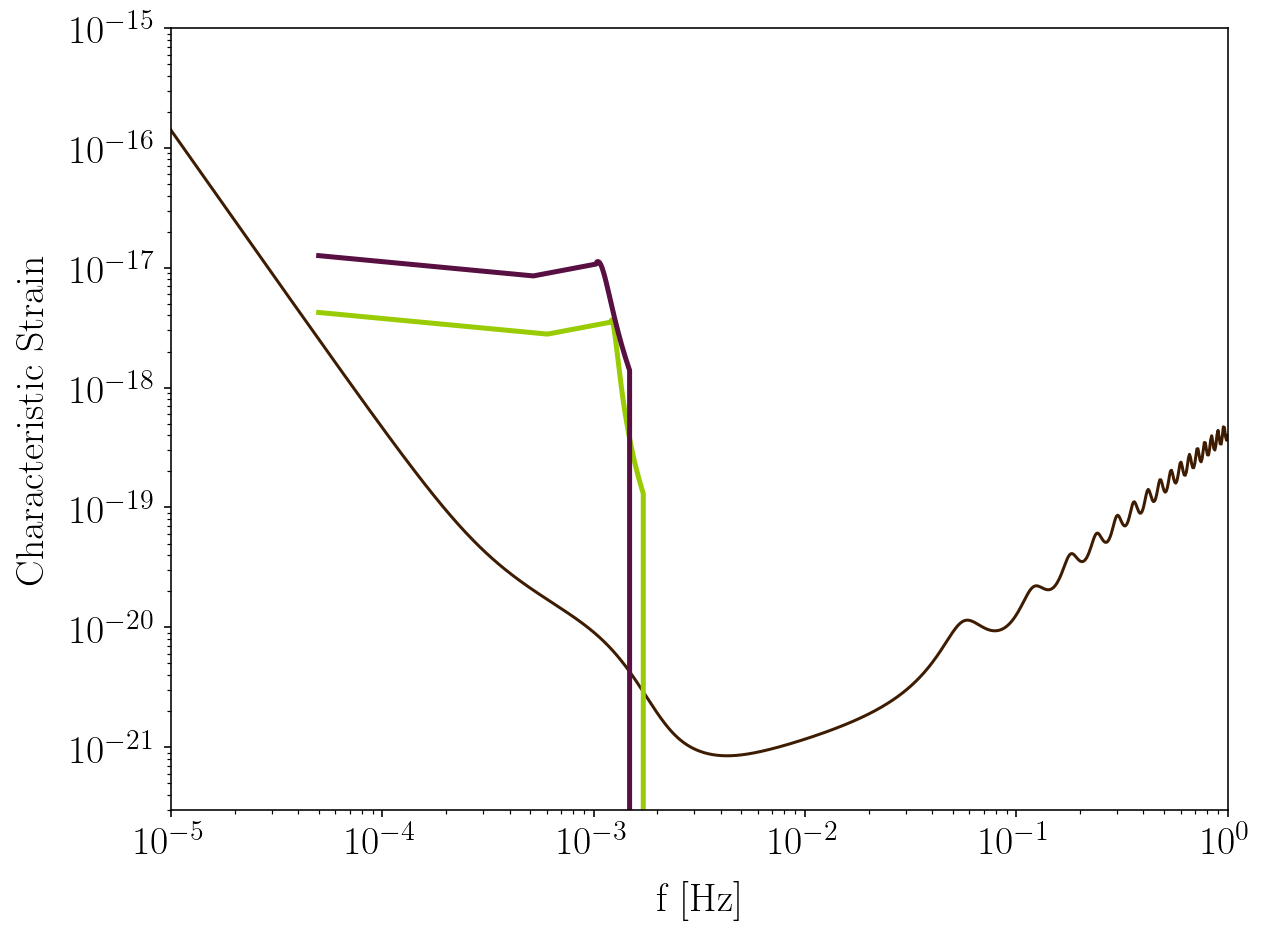

In [33]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm


# Choose a colormap
colormap = cm.summer_r
colormap = cm.Purples
colormap2= cm.Blues
#colormap = cm.Reds_r

normalize = mcolors.Normalize(vmin=80, vmax=240)

#data=np.genfromtxt('Pp5.dat', dtype=None, delimiter=" ",names=True)
# ACTUALLY, WE JUST NEED TO READ IN M1, M2, DISTANCE, BUT THESE ARE
# SET IN YOUR SIMULATIONS, SO THERE'S REALLY NO DATA TO READ IN. :)


m1 = 2.5e6*pa.TSUN
m2 = m1*0.05
z= 3 # let's pretend this M32 system is a redshift 3
f_start  = 5.e-5

m1new = 2.5e6*pa.TSUN
m2new = m1*0.5
znew= 3 # let's pretend this M32 system is a redshift 3
f_startnew  = 5.e-5
#print(lisa.Tobs)
Tobsnew=lisa.Tobs
Mtotnew = m1new + m2new # total mass
etanew = m1new*m2new/Mtotnew**2 # symmetric mass ratio
Mcnew=Mtotnew*etanew**(3./5)



theta = 0.57 #RA=153 deg =2.6 rad
phi = 0.63 #dec = +54 deg astro, 36 deg phys = 0.63 rad
iota = 0.0

fig, ax = plt.subplots(1, figsize=(8,6))
plt.tight_layout()

ax.set_xlabel(r'f [Hz]', fontsize=20, labelpad=10)
ax.set_ylabel(r'Characteristic Strain', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=20)
        
ax.set_xlim(1.0e-5, 1.0e0)
ax.set_ylim(3.0e-22, 1.0e-15)

f = np.logspace(np.log10(1.0e-5), np.log10(1.0e0), 1000)
ax.loglog(f, np.sqrt(f*lisa.Sn(f)),color='xkcd:chocolate')
#colors = plt.cm.cool(np.linspace(0,1,len(10)))


#for j in range(len(data['newredshift'])):
#    print(j)
#    m1[j]=m1[j]+j*pa.TSUN
binary = wt.Binary(m1, m2, z)
binary.f_start = f_start   
#print(binary.f_start)

binary.T_merge = 5.*Mc/(8.*np.pi*binary.f_start*Mc)**(8./3.)   

#print(Tobs)
      
#    if (any(binary.T_merge) > any(Tobs)):
#    binary.f_end = (5.*Mc[j]/(np.abs(Tobs[j]-binary.T_merge)))**(3./8.)/(8.*np.pi*Mc[j])
#else:
binary.f_end = pa.get_freq(Mtot, eta, "cut") # PhenomA cut-off frequency i.e. frequency upper bound  

binarynew = wt.Binary(m1new, m2new, znew)
binarynew.f_start = f_startnew   


binarynew.T_merge = 5.*Mcnew/(8.*np.pi*binarynew.f_start*Mcnew)**(8./3.)   


binarynew.f_end = pa.get_freq(Mtotnew, etanew, "cut") # PhenomA cut-off frequency i.e. frequency upper bound  

print(binarynew.f_end)
 
        


#    binary.SetFreqBounds(lisa)

#print(f_end)

#for j in range(len(data['redshift'])):
#print(lisa)

freqs, X_char = binary.CalcStrain(lisa)
snr = binary.CalcSNR(freqs, X_char, lisa)
print("\nSNR........ {}".format(snr))
color = colormap(normalize(snr))
ax.loglog(freqs, np.sqrt(freqs)*X_char, color='xkcd:slime green', linewidth=2.5) 

freqsnew, X_charnew = binarynew.CalcStrain(lisa)
snrnew = binary.CalcSNR(freqsnew, X_charnew, lisa)
print("\nSNR........ {}".format(snrnew))
color = colormap(normalize(snrnew))
ax.loglog(freqsnew, np.sqrt(freqsnew)*X_charnew, color='xkcd:plum', linewidth=2.5) 
#binary.PlotStrain(freqs, X_char, lisa)

plt.savefig('Fazeel.eps', bbox_inches='tight')

# Just a check to make sure the averaging of polarization was done correctly
    # The answer (SNR) should be ~ 140

Luminosity Distance provided. 
	redshift........... 2.31173518649e-07

SNR........ 139.707047722


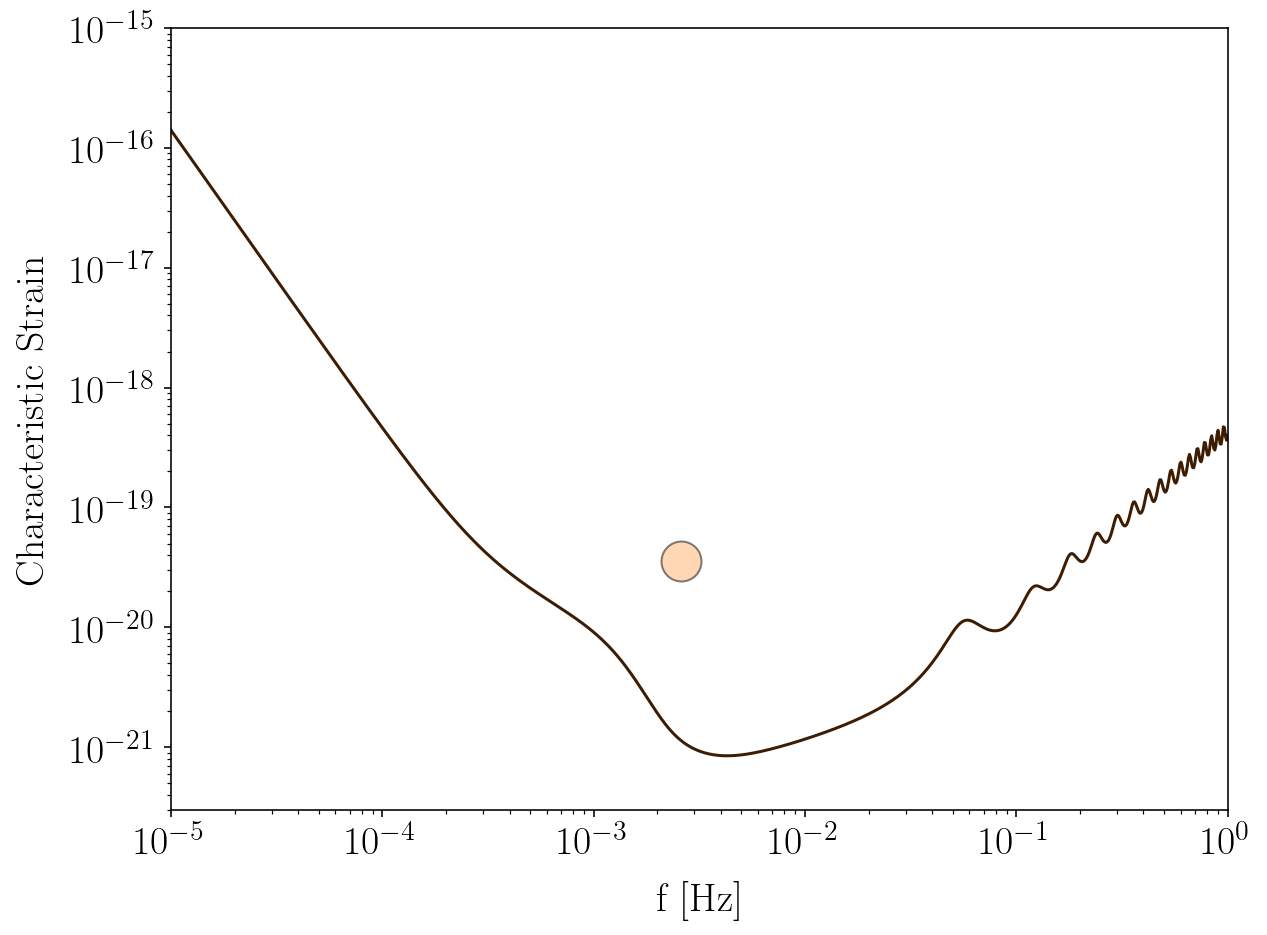

In [157]:


# sky, iota, and polarization averaged response
m1 = 0.50*pa.TSUN 
m2 = 0.25*pa.TSUN
Dl = 1.0e-3*wt.MPC
f_start  = 2.6e-3

binary = wt.Binary(m1, m2, Dl=Dl)
binary.f_start = f_start
binary.SetFreqBounds(lisa)

freqs, X_char = binary.CalcStrain(lisa)
snr = binary.CalcSNR(freqs, X_char, lisa)
print("\nSNR........ {}".format(snr))
binary.PlotStrain(freqs, X_char, lisa)

In [107]:
# numerically check that this polarization averaged result, when numerically averaged over theta, phi, iota,
#    return the numerically averaged result
num = 30
theta_arr = np.linspace(0, np.pi, num)
phi_arr = np.linspace(0, 2*np.pi, num)
iota_arr = np.linspace(0, np.pi, num)

tot = 0.0

for i in range(num):
    theta = theta_arr[i]
    for j in range(num):
        phi = phi_arr[j]
        for k in range(num):
            iota = iota_arr[k]
            freqs, X_char = binary.CalcStrain(lisa, theta, phi, iota)
            snr = binary.CalcSNR(freqs, X_char, lisa)

            tot += snr**2

avg_snr = np.sqrt(tot/num**3)
print(avg_snr)

160.11082671653546
